# Load files

In [24]:



import pandas as pd
import glob

# Define the path to the CSV files
path = r'C:\Users\clint\Desktop\Coding Task Darthmouth\Red_Sox\Red_Sox'

# Use glob to get all the CSV files in the directory
all_files = glob.glob(path + "/*.csv")

# Combine all the CSV files into a single DataFrame with an additional 'year' column
df_list = []
for file in all_files:
    df_temp = pd.read_csv(file)
    year = file.split('_')[-1].split('.')[0]  # Extract the year from the file name
    df_temp['year'] = year
    df_list.append(df_temp)

df = pd.concat(df_list, ignore_index=True)

df

,transaction_date,sectiontype,price_per_ticket,number_of_tickets,gamemonth,team,day_game,weekend_game,gamedate,logprice,days_from_transaction_until_game,year
0,2_1,RFGS,45.00,4,JUN,ATL,0.0,1.0,JUN 19,3.806663,142,2009
1,2_1,LowerBleachers,53.00,4,JUN,ATL,0.0,1.0,JUN 20,3.970292,143,2009
2,2_1,IFGS,84.99,4,JUN,ATL,0.0,1.0,JUN 19,4.442533,142,2009
3,2_1,IFGS,151.00,2,JUN,ATL,0.0,1.0,JUN 19,5.017280,142,2009
4,2_1,RFGS,45.74,4,JUN,ATL,1.0,1.0,JUN 21,3.822973,144,2009
...,...,...,...,...,...,...,...,...,...,...,...,...
453166,6_8,RFFieldBox,54.94,3,JUN,WAS,0.0,1.0,JUN 8,4.006242,0,2012
453167,6_10,IFGS,29.00,2,JUN,WAS,1.0,1.0,JUN 10,3.367296,0,2012
453168,6_7,UpperBleachers,18.93,2,JUN,WAS,0.0,1.0,JUN 8,2.940748,1,2012
453169,4_22,LogeBox,139.00,2,JUN,WAS,1.0,1.0,JUN 9,4.934474,49,2012


## Check if files were combined properly, ran properly

In [25]:
df.to_csv('compiled_df.csv', index=False)

In [26]:
# Iterate through all the CSV files and print their names and number of rows
for file in all_files:
    df_temp = pd.read_csv(file)
    print(f"File: {file}, Number of rows: {len(df_temp)}")
numbers = [105673, 118895, 152525, 76078]
total_sum = sum(numbers)
total_sum

File: C:\Users\clint\Desktop\Coding Task Darthmouth\Red_Sox\Red_Sox\red_sox_2009.csv, Number of rows: 105673
File: C:\Users\clint\Desktop\Coding Task Darthmouth\Red_Sox\Red_Sox\red_sox_2010.csv, Number of rows: 118895
File: C:\Users\clint\Desktop\Coding Task Darthmouth\Red_Sox\Red_Sox\red_sox_2011.csv, Number of rows: 152525
File: C:\Users\clint\Desktop\Coding Task Darthmouth\Red_Sox\Red_Sox\red_sox_2012.csv, Number of rows: 76078


453171

In [27]:
# remove outliers
df = df[df['price_per_ticket'] <= 8000]
df
# Remove duplicate rows from the DataFrame
df = df.drop_duplicates()

df

,transaction_date,sectiontype,price_per_ticket,number_of_tickets,gamemonth,team,day_game,weekend_game,gamedate,logprice,days_from_transaction_until_game,year
0,2_1,RFGS,45.00,4,JUN,ATL,0.0,1.0,JUN 19,3.806663,142,2009
1,2_1,LowerBleachers,53.00,4,JUN,ATL,0.0,1.0,JUN 20,3.970292,143,2009
2,2_1,IFGS,84.99,4,JUN,ATL,0.0,1.0,JUN 19,4.442533,142,2009
3,2_1,IFGS,151.00,2,JUN,ATL,0.0,1.0,JUN 19,5.017280,142,2009
4,2_1,RFGS,45.74,4,JUN,ATL,1.0,1.0,JUN 21,3.822973,144,2009
...,...,...,...,...,...,...,...,...,...,...,...,...
453166,6_8,RFFieldBox,54.94,3,JUN,WAS,0.0,1.0,JUN 8,4.006242,0,2012
453167,6_10,IFGS,29.00,2,JUN,WAS,1.0,1.0,JUN 10,3.367296,0,2012
453168,6_7,UpperBleachers,18.93,2,JUN,WAS,0.0,1.0,JUN 8,2.940748,1,2012
453169,4_22,LogeBox,139.00,2,JUN,WAS,1.0,1.0,JUN 9,4.934474,49,2012


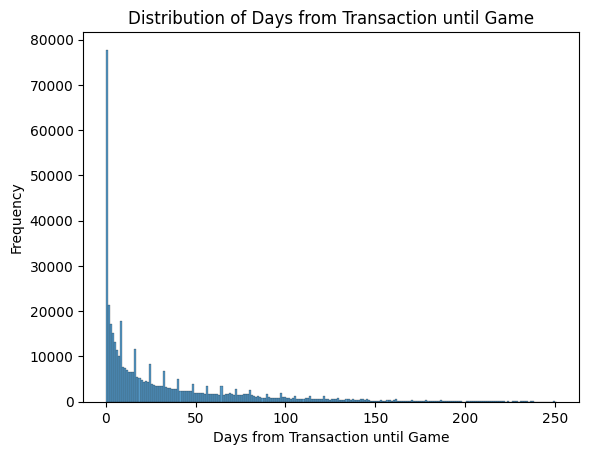

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of days_from_transaction_until_game without specifying bins
sns.histplot(df['days_from_transaction_until_game'])
plt.xlabel('Days from Transaction until Game')
plt.ylabel('Frequency')
plt.title('Distribution of Days from Transaction until Game')
plt.show()


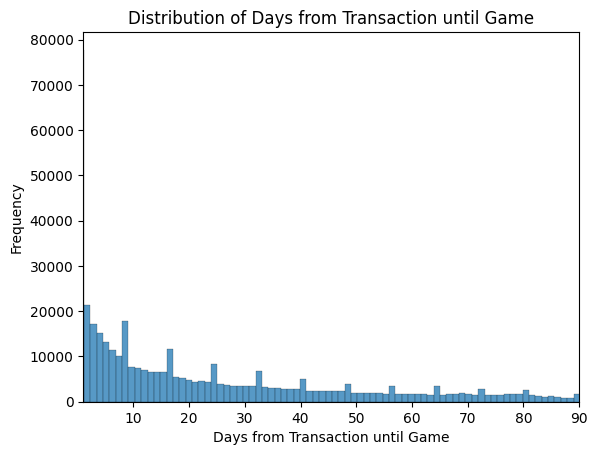

In [47]:
import seaborn as sns

import matplotlib.pyplot as plt

# Plot the distribution of days_from_transaction_until_game with x-axis limited from 0 to 30
sns.histplot(df['days_from_transaction_until_game'])
plt.xlabel('Days from Transaction until Game')
plt.ylabel('Frequency')
plt.title('Distribution of Days from Transaction until Game')
plt.xlim(1, 90)
plt.show()

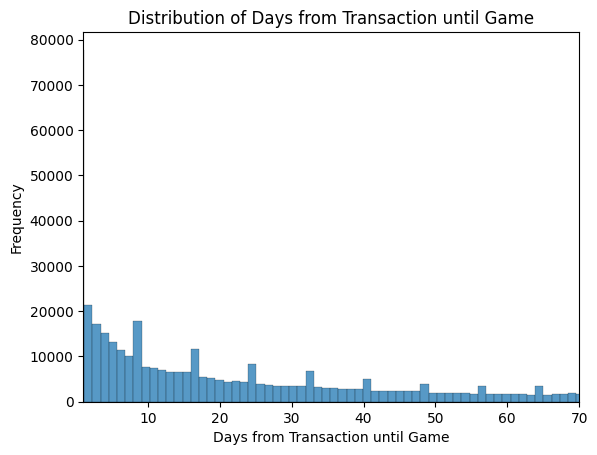

In [44]:
import seaborn as sns

import matplotlib.pyplot as plt

# Plot the distribution of days_from_transaction_until_game with x-axis limited from 10 to 40
sns.histplot(df['days_from_transaction_until_game'])
plt.xlabel('Days from Transaction until Game')
plt.ylabel('Frequency')
plt.title('Distribution of Days from Transaction until Game')
plt.xlim(1, 70)
plt.show()